### Question 1)

#### A) In the figure, goog200 is going upwards as per the day(unit time) is increasing so this will result variability in mean across the time series (not constant mean) thats why data is NOT stationary.

#### c) The time series which is given have variablity in mean during two time intervals 1950-1965 and  1970-1980 therefore the data is not stationary.

#### d) The time series which is given have variablity in different time duration 1975-80 and 1985-90 in there mean  therefore the data is not stationary.

#### e) Because the timeseries is getting decreased over time, so the mean is not constant because of variability in mean over the time make data non stationary. 

#### f) Because the timeseries in 1980-85 have approximatly same mean but in 1985-1995 data have variability  in there mean so data non stationary. 

#### h) Time series is in decreasing order thats why the mean is variable across the time period so the data is not stationary 

#### i)  Because the timeseries is getting increased over time, so the mean is not constant because of variability in mean over the time make data non stationary.
#### Rest of them  b) and g) are stationary 

### Question 3)

In [97]:
# Reference : http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html
# Required Packages to import 
import csv
import os
import copy
import seaborn as sn
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from dateutil.parser import parse 
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [55]:
# Calculate the accuracy 
def accuracy(predict,real):
    '''To calculate the accuracy 
    Parameters : 
    predict : predictions for test data 
    real : real label for test data
    '''
    count = 0
    for i in range(len(predict)):
        if predict[i] == real[i]:
            count = count +1
    return count/len(predict)

In [79]:
def predict_result(prob):
    '''To predict the label given probabilities
    prob: Given array of probabilities  for test data points
    '''
    test = []
    for i in prob:
        if i >0.5:
            test.append("benign")
        else:
            test.append("malignant")
    return test

In [80]:
def train_test(train_loc,test_loc):
    '''To train test data 
    Parameters : 
    train_loc : train location 
    test_loc: test data location
    '''
    train = pd.read_csv(train_loc, header=0, parse_dates=[0], index_col=0, squeeze=True,date_parser = parser)
    test = pd.read_csv(test_loc)
    return train,test

In [82]:
def read_file(file_loc):
    '''Reading the file 
    Parameters : 
    file_loc : file location for given dataset 
    '''
    # Reading the dataframe for csv file for dataset
    df = pd.read_csv(file_loc)
    # To make nan value for cell as 0.
    df = df.fillna(0)
    return df

In [90]:
def processing_dataframe(df1):
    '''Processing the data frame 
    Parameters : 
    df1: dataframe to preprocess
    '''
    df = copy.deepcopy(df1)
    df = df.drop(columns = "Id")
    df = df.drop(columns = "S.No")
    classes = df['Class']
    df.columns=['A','B','C','D','E','F','G','H','I','J']
    # df = df.drop(columns = "Class")
    dataset = np.array(df)
    # Making train test split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="J"), df["J"], test_size=0.33, random_state=42)
    df_train = pd.concat([X_train, y_train],axis = 1)
    return df_train,X_train,X_test, y_train, y_test

In [110]:
def glm_function(df_train):
    '''GLM function to run the glm model
    Parameters : 
    df_train : train data frame to train the glm model
    '''
    # Formula used and train the glm function
    formula = "J~A+B+C+D+E+F+G+H+I"
    model = smf.glm(formula = formula, data=df_train, family=sm.families.Binomial())
    result = model.fit()
    print(result.summary())
    return result

In [91]:
df = read_file("Data/breast_cancer.csv")
df_train,X_train,X_test, y_train, y_test= processing_dataframe(df)

In [106]:
result  = glm_function(df_train)

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['J[benign]', 'J[malignant]']   No. Observations:                  468
Model:                                       GLM   Df Residuals:                      458
Model Family:                           Binomial   Df Model:                            9
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -39.685
Date:                           Tue, 29 Oct 2019   Deviance:                       79.370
Time:                                   19:34:10   Pearson chi2:                     234.
No. Iterations:                                8   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3226      1.225

# GLM Summary Report :
1. Standard Error for last feature i.e, Mitoses is high as compared to other features.
2. Cell size is contributing more to glm function since its coefficient value is larger than others
3. Weights of other features (other than cellsize) is negative and cellsize coefficient is positive. So, it means cell size is contributing toward the value of glm.
4. Intercept has high standard error (w*x + intercept).
5. Covariance type is non-robust
6. Number of Iterations, it did : 8
7. Link function used : logit
    Deviance Value of glm fitted : 79.370

In [93]:
prediction_prob = result.predict(X_test)
predictions = predict_result(prediction_prob)

In [94]:
print("Accuracy : ",accuracy(predictions,np.array(y_test))*100)

Accuracy :  96.1038961038961


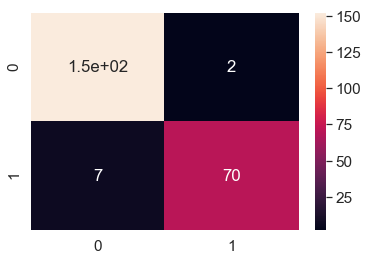

In [95]:
conf  = confusion_matrix(np.array(y_test), predictions)
sn.set(font_scale=1.4)#for label size
sn.heatmap(conf, annot=True)
plt.show()

In [101]:
odd_ratio = result.params
print("Odd ratio : ",np.exp(odd_ratio))

Odd ratio :  Intercept    11187.921296
A                0.603764
B                1.029160
C                0.706901
D                0.810103
E                0.996636
F                0.607204
G                0.663781
H                0.948685
I                0.641063
dtype: float64


In [102]:
# Confidence Interval
confidence = result.conf_int()
confidence.columns = ["2.5%","97.5%"]

In [109]:
print("Confidence Interval : \n",np.exp(confidence))

Confidence Interval : 
                   2.5%          97.5%
Intercept  1013.112474  123549.542755
A             0.442048       0.824640
B             0.640132       1.654611
C             0.408553       1.223121
D             0.627669       1.045563
E             0.691750       1.435900
F             0.493366       0.747309
G             0.467825       0.941818
H             0.734677       1.225032
I             0.345501       1.189463


# Interpretations for Odd ratio : 
1. Odds ratio of exactly 1 means that exposure to property 1 does not affect the odds of property 2.
2. Odds ratio of more than 1 means that there is a higher odds of property 2 happening with exposure to property 1.
3. Odds ratio is less than 1 is associated with lower odds.